In [1]:
from truthnet import truthnet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [4]:
df=pd.read_csv('data/gibbonsglobal.csv',index_col=0).astype(str).replace('-9','')
#df=df[df.Dx=='0']
df.drop('Dx',axis=1).to_csv('data/global.csv',index=None)
df

,Dx,2,3,5,6,7,8,9,10,11,...,4592,4593,4594,4596,4631,4632,4634,4635,4636,4637
ID,,,,,,,,,,,,,,,,,,,,,
CIM12536,0,,,,,,,,,,...,,,,,,,,,,
CIS69110,1,,,,,,1,,,,...,,,,,,,,,,
CIQ85803,1,,,,,,,,,,...,,,,3,,,,,,
CIM76210,0,,,,1,,,,1,,...,,,,3,,,,,,
CIM49950,1,,,1,1,,,,,,...,,,,1,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MHB77415,1,,,,2,,,,,,...,,,,5,,,,,,
KHA81506,1,,,1,,,,1,,,...,,,,3,,,,,,
KHA93184,1,,,,,,,,,1,...,,,,4,,,,,,


In [5]:
Tr=truthnet()
## load data and infer qnet
features,samples = Tr.load_data(datapath="data/global.csv")

Tr.fit(fit=True,modelpath="results/global.joblib")
Tr.getDissonance(outfile="mpi_tmp/global_dissonance.csv",processes=11)

In [7]:
suspects,usamples=Tr.getSuspects(alpha=.01,mode='uniform',return_samples=True)
suspects.join(pd.read_csv("data/global.csv"))

,mean_dissonance,2,3,5,6,7,8,9,10,11,...,4592,4593,4594,4596,4631,4632,4634,4635,4636,4637


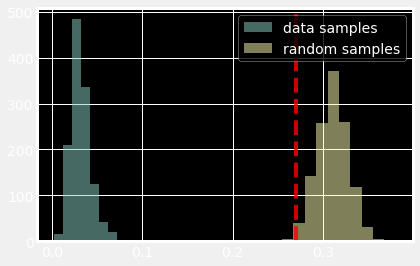

In [8]:
plt.figure()
plt.style.use('dark_background')
dissonance = pd.DataFrame(data=Tr.dissonance.mean(axis=1), columns=["Qnet"])
dissonance["random"] = Tr.urandom_dissonance_df.mean(axis=1)
plt.hist(dissonance["Qnet"], alpha=0.5, label="data samples")
plt.hist(dissonance["random"], alpha=0.5, label="random samples")
plt.legend()
plt.axvline(Tr.cithreshold[('suspect',0.01)][0], color="red", linestyle="--", alpha=.8)

In [ ]:
coresamples,vsamples=Tr.getCoresamples(alpha=.01,steps=70,return_samples=True)
coresamples.join(pd.read_csv("data/global.csv"))

In [ ]:
plt.figure()
plt.style.use('dark_background')
dissonance = pd.DataFrame(data=Tr.dissonance.mean(axis=1), columns=["Qnet"])
dissonance["core"] = Tr.null_dissonance_df.mean(axis=1)
plt.hist(dissonance["Qnet"], alpha=0.5, label="data samples")
plt.hist(dissonance["core"], alpha=0.5, label="core samples")
plt.legend()
plt.axvline(Tr.cithreshold[('core',0.01)][1], color="red", linestyle="--", alpha=.8)

In [8]:
Tr.cithreshold

{('suspect', 0.01): (0.022368950608340876, 0.056235977227592535),
 ('core', 0.01): (0.017736092848011222, 0.047689732862238585)}

In [ ]:
Tr.null_dissonance_df